In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 97% 1.03G/1.06G [00:09<00:00, 267MB/s]
100% 1.06G/1.06G [00:09<00:00, 121MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout,BatchNormalization

In [ ]:
#  generator large data ko multiple small batch me convert karta ha so that we can utilize the memory efficiently

train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
### create CNN Model

model=Sequential([
    Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'),

    Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'),

    Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'),

    Flatten(),

    Dense(128,activation='relu'),
    Dropout(0.1),

    Dense(64,activation='relu'),
    Dropout(0.1),

    Dense(1,activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 67s 88ms/step - loss: 0.6815 - accuracy: 0.5735 - val_loss: 0.6519 - val_accuracy: 0.6164
Epoch 2/10
625/625 [==============================] - 83s 131ms/step - loss: 0.5686 - accuracy: 0.7078 - val_loss: 0.4950 - val_accuracy: 0.7696
Epoch 3/10
625/625 [==============================] - 70s 111ms/step - loss: 0.4514 - accuracy: 0.7883 - val_loss: 0.4989 - val_accuracy: 0.7664
Epoch 4/10
625/625 [==============================] - 57s 90ms/step - loss: 0.3309 - accuracy: 0.8561 - val_loss: 0.6235 - val_accuracy: 0.7760
Epoch 5/10
625/625 [==============================] - 61s 97ms/step - loss: 0.1962 - accuracy: 0.9214 - val_loss: 0.9745 - val_accuracy: 0.7568
Epoch 6/10
625/625 [==============================] - 55s 87ms/step - loss: 0.1224 - accuracy: 0.9548 - val_loss: 0.8558 - val_accuracy: 0.7806
Epoch 7/10
625/625 [==============================] - 66s 105ms/step - loss: 0.0834 - accuracy: 0.9712 - val_loss: 0.9978 - val_accura

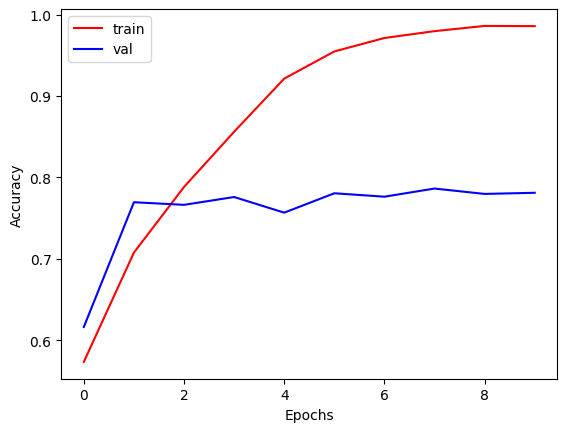

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


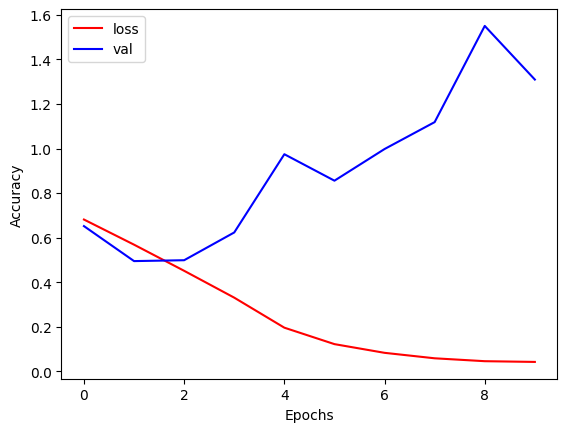

In [ ]:
plt.plot(history.history['loss'],color='red',label='loss')
plt.plot(history.history['val_loss'],color='blue',label='val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
import cv2

test_img = cv2.imread('/content/puppy-1207816_640.jpg')


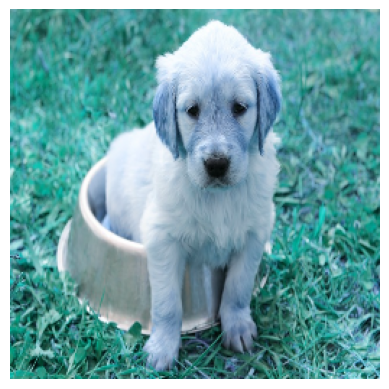

In [ ]:
plt.imshow(test_img)
plt.axis('off')
plt.show()

In [ ]:
test_img.shape

(462, 640, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 30ms/step


array([[1.]], dtype=float32)